<a href="https://colab.research.google.com/github/Mifekmk/SkillTreePython-DeepLearning/blob/main/03.NLP-with-tensorflow2.0/ch03_02_NLP%EA%B8%B0%EC%B4%88_imdb%EB%A6%AC%EB%B7%B0%EB%B6%84%EB%A5%98_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch03.02 NLP기초 - imdb 리뷰 분류
---

* 날짜: 2022-07-14
* 이름: 김민규

## 학습내용
    - 텍스트 전처리 과정을 이해한다.
      * 텍스트 토큰화
      * 텍스트 인덱싱
      * 원-핫 인코딩
      * 텍스트 임베딩
    - 간단한 문장을 분류하는 딥러닝 모델을 구현한다.



```
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning
```

In [1]:
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning

Cloning into 'SkillTreePython-DeepLearning'...
remote: Enumerating objects: 710, done.
remote: Counting objects: 100% (283/283), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 710 (delta 174), reused 255 (delta 155), pack-reused 427
Receiving objects: 100% (710/710), 38.09 MiB | 31.30 MiB/s, done.
Resolving deltas: 100% (367/367), done.


```
import sys
sys.path.append('/content/SkillTreePython-DeepLearning/scripts')
from import_lib import *
```

In [2]:
import sys
sys.path.append('/content/SkillTreePython-DeepLearning/scripts')
from import_lib import *

## FCN 모델을 이용한 영화리뷰 분류
---

### **| 데이터 처리**

In [4]:
from tensorflow.keras.datasets import imdb
# FCN : Fully Connected Network (Dense layer)
max_features = 500 # 많은 단어를 사용할수록 성능 향상? -> 다차원 데이터를 다루기 위해서는 FCN으로는 어렵다.
max_len = 100 # 문장안에 존재할 최대 단어 수
# (100,500) 매트릭스 생성
# 문장 -> (단어의 개수, 단어의 벡터길이)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features) # 몇 개의 단어를 사용할 것인가(원-핫 벡터는 계속 늘어나게 됩니다.)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(25000,) (25000,) (25000,) (25000,)


In [5]:
print('첫번째 리뷰:', x_train[0])
print('첫번째 리뷰의 단어 개수:',len(x_train[0]))
print('첫번째 리뷰의 클래스:',y_train[0]) # 긍정: 1 , 부정: 0

첫번째 리뷰: [1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
첫번째 리뷰의 단어 개수: 218
첫번째 리뷰의 클래스: 1


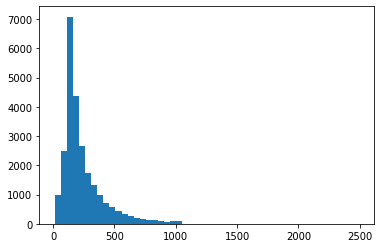

In [6]:
# 문장 안에 단어가 몇개씩 들어있는가?
x_lens = [len(x) for x in x_train]
_=plt.hist(x_lens, bins=50)

In [7]:
# 딕셔너리
word2index = imdb.get_word_index()
word2index

1654784/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [8]:
index2word = {}
for word, idx in word2index.items():
    index2word[idx+3]=word # +3을 해야 실제 모델과 맞습니다.

In [9]:
index2word[14]

'this'

In [10]:
# 첫 째 리뷰 해석
review = x_train[0]
trans = []
for index in review:
    if index in index2word.keys():
        trans.append(index2word[index])
        # print(index2word[index])
print(' '.join(x for x in trans))
print(review)

this film was just story direction really the part they played and you could just being there is an amazing actor and now the same being director father came from the same as so i loved the fact there was a real with this film the throughout the film were great it was just so much that i the film as as it was for and would recommend it to everyone to watch and the was amazing really at the end it was so and you know what they say if you at a film it must have been good and this definitely was also to the two little that played the of and they were just children are often left out of the i think because the stars that play them all up are such a big for the whole film but these children are amazing and should be for what they have done don't you think the whole story was so because it was true and was life after all that was with us all
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336,

In [11]:
print('imdb 데이터에 있는 모든 단어 수 : ',len(word2index), len(index2word))
print('우리가 사용할 단어수:', max_features)
# 빈도수 순으로 500개 단어에 대해서만 원핫

imdb 데이터에 있는 모든 단어 수 :  88584 88584
우리가 사용할 단어수: 500


In [12]:
print('빈도가 높은 단어:',index2word[4], index2word[5], index2word[6])

빈도가 높은 단어: the and a


## 전처리의 끝 ( 이거만 하면됨)

In [13]:
from tensorflow.keras.datasets import imdb
# FCN : Fully Connected Network (Dense layer)
max_features = 500 # 많은 단어를 사용할수록 성능 향상? -> 다차원 데이터를 다루기 위해서는 FCN으로는 어렵다.
max_len = 100 # 문장안에 존재할 최대 단어 수
# 문장 -> (단어의 개수, 단어의 벡터길이)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features) # 몇 개의 단어를 사용할 것인가(원-핫 벡터는 계속 늘어나게 됩니다.)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

print('패딩 전:',max_len, x_train.shape, y_test.shape)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)
print('패딩 후:',x_train.shape, x_test.shape)

(25000,) (25000,) (25000,) (25000,)
패딩 전: 100 (25000,) (25000,)
패딩 후: (25000, 100) (25000, 100)


In [14]:
x_train[0]

array([  2,  33,   6,  22,  12, 215,  28,  77,  52,   5,  14, 407,  16,
        82,   2,   8,   4, 107, 117,   2,  15, 256,   4,   2,   7,   2,
         5,   2,  36,  71,  43,   2, 476,  26, 400, 317,  46,   7,   4,
         2,   2,  13, 104,  88,   4, 381,  15, 297,  98,  32,   2,  56,
        26, 141,   6, 194,   2,  18,   4, 226,  22,  21, 134, 476,  26,
       480,   5, 144,  30,   2,  18,  51,  36,  28, 224,  92,  25, 104,
         4, 226,  65,  16,  38,   2,  88,  12,  16, 283,   5,  16,   2,
       113, 103,  32,  15,  16,   2,  19, 178,  32], dtype=int32)

### **| 모델 학습**

In [16]:
def create_model(max_len, max_features, emb_dims):
    x = layers.Input(shape=max_len)
    y = layers.Embedding(max_features, emb_dims)(x)
    y = layers.Flatten()(y)
    y = layers.Dense(32, activation='relu')(y)
    y = layers.Dense(24, activation='tanh')(y)
    y = layers.Dense(16, activation='relu')(y)
    y = layers.Dense(5, activation='tanh')(y)
    y = layers.Dense(1, activation='sigmoid')(y) # 이진분류
    return models.Model(x,y)

In [17]:
model = create_model(max_len, max_features, 100)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 100)          50000     
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 32)                320032    
                                                                 
 dense_1 (Dense)             (None, 24)                792       
                                                                 
 dense_2 (Dense)             (None, 16)                400       
                                                                 
 dense_3 (Dense)             (None, 5)                 85    

In [18]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 7s 5ms/step - loss: 0.5297 - acc: 0.7174 - val_loss: 0.4607 - val_acc: 0.7856
Epoch 2/20
625/625 [==============================] - 2s 4ms/step - loss: 0.3538 - acc: 0.8481 - val_loss: 0.4848 - val_acc: 0.7802
Epoch 3/20
625/625 [==============================] - 2s 4ms/step - loss: 0.2164 - acc: 0.9164 - val_loss: 0.6450 - val_acc: 0.7536
Epoch 4/20
625/625 [==============================] - 2s 4ms/step - loss: 0.1285 - acc: 0.9574 - val_loss: 0.7121 - val_acc: 0.7506
Epoch 5/20
625/625 [==============================] - 2s 4ms/step - loss: 0.0876 - acc: 0.9737 - val_loss: 0.8288 - val_acc: 0.7424
Epoch 6/20
625/625 [==============================] - 2s 4ms/step - loss: 0.0698 - acc: 0.9793 - val_loss: 0.8380 - val_acc: 0.7518
Epoch 7/20
625/625 [==============================] - 2s 4ms/step - loss: 0.0570 - acc: 0.9836 - val_loss: 0.9438 - val_acc: 0.7508
Epoch 8/20
625/625 [==============================] - 2s 4ms/step - loss: 0.

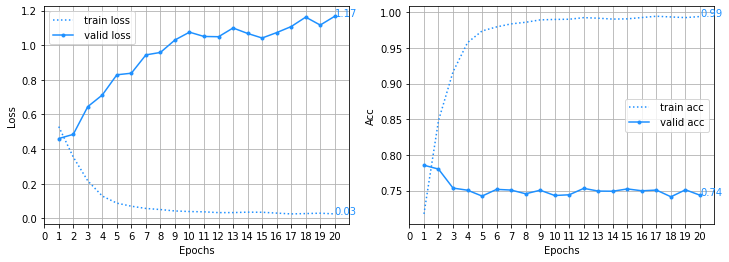

In [19]:
from plot_result import plot_lcurve
plot_lcurve([history],[''], ['dodgerblue'])

## 사전 훈련된 Embedding 사용하기
---



### **| GloVe 단어 임베딩 내려받기**

```
https://drive.google.com/u/0/uc?id=1ams5_zp8NrfmbxSzTDCglRpAvjFGi5JY&export=download
```

In [20]:
! gdown https://drive.google.com/u/0/uc?id=1ams5_zp8NrfmbxSzTDCglRpAvjFGi5JY&export=download

Downloading...
From: https://drive.google.com/u/0/uc?id=1ams5_zp8NrfmbxSzTDCglRpAvjFGi5JY
To: /content/glove.6B.zip
100% 862M/862M [00:15<00:00, 56.3MB/s]


In [21]:
! unzip /content/glove.6B.zip

Archive:  /content/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [22]:
word2embedding = {}
f = open('/content/glove.6B.100d.txt',encoding='utf8')
for line in f:
    word = line.split()[0] # 가장 첫 번째 값이 단어
    vec = line.split()[1:] # 그 후는 단어에 대한 벡터
    vec = np.asarray(vec, dtype='float32') # list -> array로 변환 , float32로 문자열을 실수열로 변경
    # print(word, len(vec), vec)
    # break
    word2embedding[word] = vec
f.close()

In [23]:
word2embedding['king']

array([-0.32307 , -0.87616 ,  0.21977 ,  0.25268 ,  0.22976 ,  0.7388  ,
       -0.37954 , -0.35307 , -0.84369 , -1.1113  , -0.30266 ,  0.33178 ,
       -0.25113 ,  0.30448 , -0.077491, -0.89815 ,  0.092496, -1.1407  ,
       -0.58324 ,  0.66869 , -0.23122 , -0.95855 ,  0.28262 , -0.078848,
        0.75315 ,  0.26584 ,  0.3422  , -0.33949 ,  0.95608 ,  0.065641,
        0.45747 ,  0.39835 ,  0.57965 ,  0.39267 , -0.21851 ,  0.58795 ,
       -0.55999 ,  0.63368 , -0.043983, -0.68731 , -0.37841 ,  0.38026 ,
        0.61641 , -0.88269 , -0.12346 , -0.37928 , -0.38318 ,  0.23868 ,
        0.6685  , -0.43321 , -0.11065 ,  0.081723,  1.1569  ,  0.78958 ,
       -0.21223 , -2.3211  , -0.67806 ,  0.44561 ,  0.65707 ,  0.1045  ,
        0.46217 ,  0.19912 ,  0.25802 ,  0.057194,  0.53443 , -0.43133 ,
       -0.34311 ,  0.59789 , -0.58417 ,  0.068995,  0.23944 , -0.85181 ,
        0.30379 , -0.34177 , -0.25746 , -0.031101, -0.16285 ,  0.45169 ,
       -0.91627 ,  0.64521 ,  0.73281 , -0.22752 , 

In [24]:
word2embedding['queen']
# 상관 분석을 하게 되면 가까울수록 1, 멀수록 -1에 가까워지게 될 것입니다.

array([-0.50045 , -0.70826 ,  0.55388 ,  0.673   ,  0.22486 ,  0.60281 ,
       -0.26194 ,  0.73872 , -0.65383 , -0.21606 , -0.33806 ,  0.24498 ,
       -0.51497 ,  0.8568  , -0.37199 , -0.58824 ,  0.30637 , -0.30668 ,
       -0.2187  ,  0.78369 , -0.61944 , -0.54925 ,  0.43067 , -0.027348,
        0.97574 ,  0.46169 ,  0.11486 , -0.99842 ,  1.0661  , -0.20819 ,
        0.53158 ,  0.40922 ,  1.0406  ,  0.24943 ,  0.18709 ,  0.41528 ,
       -0.95408 ,  0.36822 , -0.37948 , -0.6802  , -0.14578 , -0.20113 ,
        0.17113 , -0.55705 ,  0.7191  ,  0.070014, -0.23637 ,  0.49534 ,
        1.1576  , -0.05078 ,  0.25731 , -0.091052,  1.2663  ,  1.1047  ,
       -0.51584 , -2.0033  , -0.64821 ,  0.16417 ,  0.32935 ,  0.048484,
        0.18997 ,  0.66116 ,  0.080882,  0.3364  ,  0.22758 ,  0.1462  ,
       -0.51005 ,  0.63777 ,  0.47299 , -0.3282  ,  0.083899, -0.78547 ,
        0.099148,  0.039176,  0.27893 ,  0.11747 ,  0.57862 ,  0.043639,
       -0.15965 , -0.35304 , -0.048965, -0.32461 , 

In [25]:
len(word2embedding) # 40만개의 단어

400000

### **| 임베딩 매트릭스 제작**


In [26]:
print('imdb 딕셔너리의 모든 단어 수 :', len(word2index))
print('우리 모델에서 모든 단어 수 :', max_features)
print('glove 임베딩에 있는모든 단어 수 : ', len(word2embedding))

imdb 딕셔너리의 모든 단어 수 : 88584
우리 모델에서 모든 단어 수 : 500
glove 임베딩에 있는모든 단어 수 :  400000


In [27]:
embed_mx = np.zeros((max_features, 100))
# 매트릭스의 크기 : (500, 100)
embed_mx.shape

(500, 100)

In [ ]:
# for i in range(500):
#     print(index2word[i+4])

In [28]:
for idx in range(4, 504):
  word = index2word[idx]
  embed = word2embedding.get(word) # 딕셔너리.get 함수는 없으면 None값 반환
  #print(word, embed)
  if embed is not None:
    embed_mx[idx-4] = embed

### **| 임베딩 매트릭스 적용하기**

In [29]:
model = create_model(max_len, max_features, 100)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 100, 100)          50000     
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_5 (Dense)             (None, 32)                320032    
                                                                 
 dense_6 (Dense)             (None, 24)                792       
                                                                 
 dense_7 (Dense)             (None, 16)                400       
                                                                 
 dense_8 (Dense)             (None, 5)                 85  

In [30]:
model.layers[1].set_weights([embed_mx]) # 가중치를 Glove 값으로 초기화

In [31]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 4s 5ms/step - loss: 0.6949 - acc: 0.5029 - val_loss: 0.6969 - val_acc: 0.4938
Epoch 2/20
625/625 [==============================] - 3s 4ms/step - loss: 0.6937 - acc: 0.5019 - val_loss: 0.6956 - val_acc: 0.4936
Epoch 3/20
625/625 [==============================] - 3s 4ms/step - loss: 0.6712 - acc: 0.5802 - val_loss: 0.6425 - val_acc: 0.6332
Epoch 4/20
625/625 [==============================] - 3s 4ms/step - loss: 0.5432 - acc: 0.7275 - val_loss: 0.5383 - val_acc: 0.7254
Epoch 5/20
625/625 [==============================] - 3s 4ms/step - loss: 0.4565 - acc: 0.7904 - val_loss: 0.4921 - val_acc: 0.7650
Epoch 6/20
625/625 [==============================] - 3s 4ms/step - loss: 0.4047 - acc: 0.8208 - val_loss: 0.4922 - val_acc: 0.7696
Epoch 7/20
625/625 [==============================] - 3s 4ms/step - loss: 0.3715 - acc: 0.8389 - val_loss: 0.4801 - val_acc: 0.7704
Epoch 8/20
625/625 [==============================] - 3s 4ms/step - loss: 0.

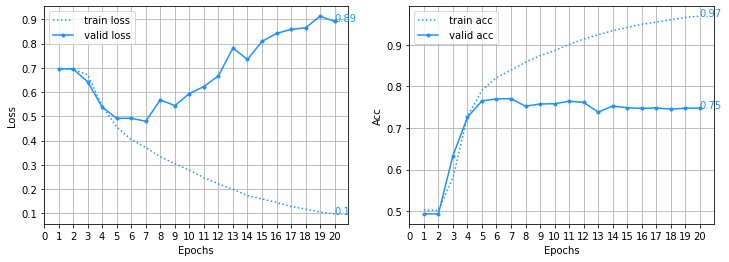

In [32]:
from plot_result import plot_lcurve
plot_lcurve([history],[''], ['dodgerblue'])

## 추가 학습 : 규제 적용하기
---

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 100, 100)          50000     
                                                                 
 flatten_2 (Flatten)         (None, 10000)             0         
                                                                 
 dense_10 (Dense)            (None, 32)                320032    
                                                                 
 dense_11 (Dense)            (None, 24)                792       
                                                                 
 dense_12 (Dense)            (None, 16)                400       
                                                                 
 dense_13 (Dense)            (None, 5)                 85  

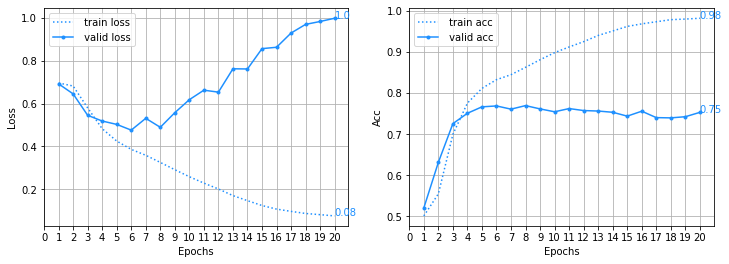

In [33]:
def create_regular_model(max_len, max_features, emb_dims):
    x = layers.Input(shape=max_len)
    y = layers.Embedding(max_features, emb_dims)(x)
    y = layers.Flatten()(y)
    y = layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1))(y)
    y = layers.Dense(1, activation='sigmoid')(y) # 이진분류
    return models.Model(x,y)

model = create_model(max_len, max_features, 100)
model.summary()
model.layers[1].set_weights([embed_mx])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)

from plot_result import plot_lcurve
plot_lcurve([history],[''], ['dodgerblue'])

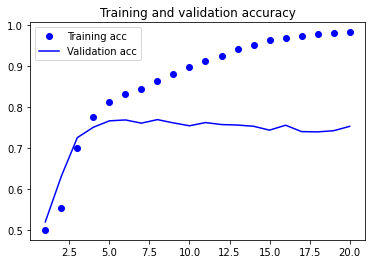

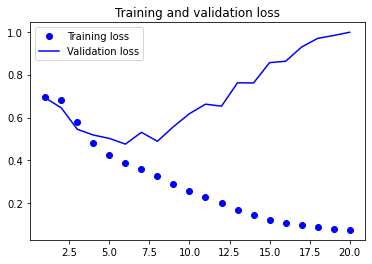

In [34]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.legend()

plt.show()